<a href="https://colab.research.google.com/github/amanjain487/tsai-eva6/blob/main/Assignments/S8/Advanced%20Training%20Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 8 - Advanced Training Concepts
## Clone Github Repo

In [1]:
%rm -rf 'CIFAR_10'
!git clone https://github.com/amanjain487/CIFAR_10

Cloning into 'CIFAR_10'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (251/251), done.
remote: Total 257 (delta 130), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (257/257), 59.85 KiB | 5.98 MiB/s, done.
Resolving deltas: 100% (130/130), done.


## Append model path and install Albumentations

In [2]:
import sys
sys.path.append('/CIFAR_10/')

!pip install git+https://github.com/albumentations-team/albumentations.git


  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-gs547jjl
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-gs547jjl
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98531 sha256=61393ffbe90647ccd00bfa9eeff71a8b686d702629b6f8a52c61b3c1ba9e0e16
  Stored in directory: /tmp/pip-ephem-wheel-cache-5cn2lg1o/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations


## Importing Libraries

In [3]:
from CIFAR_10.models import resnet
from CIFAR_10 import utils
from CIFAR_10 import main
from CIFAR_10.GradCAM.visualize import VisualizeCam

!pip install torchsummary
from torchsummary import summary

import torch

## Determine device, optimizer, scheduler, etc.,

In [4]:
device, best_acc, classes, net, criterion, optimizer, scheduler = main.define_model_utilities(loss="cross_entropy", optimizer_func="SGD", lr=0.1)

## Print Model Summary

In [5]:
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

## Get transformation function to apply on train dataset

In [6]:
tensor_transforms, numpy_transforms = utils.train_transform(["totensor", "normalize_mean", "randomcrop", "horizontal_flip", "cutout", "random_rotate"])

## Apply transformations and get train and test set

In [7]:
train_set, test_set = utils.load_dataset(tensor_transforms, numpy_transforms)

Files already downloaded and verified
Files already downloaded and verified


## Create Data loaders

In [8]:
train_loader, test_loader = main.dataloaders(train_set, test_set)

## Train model

In [9]:
train_loss, train_acc, test_loss, test_acc = main.start_training(40, net, criterion, optimizer, device, train_loader, test_loader, best_acc, scheduler)


Epoch: 1
Train Loss: 2.796 | Train Acc: 16.596% (8298/50000)
Test Loss: 2.036 | Test Acc: 23.200% (2320/10000)

Epoch: 2
Train Loss: 1.959 | Train Acc: 26.162% (13081/50000)
Test Loss: 1.826 | Test Acc: 32.280% (3228/10000)

Epoch: 3
Train Loss: 1.835 | Train Acc: 31.320% (15660/50000)
Test Loss: 1.729 | Test Acc: 36.030% (3603/10000)

Epoch: 4
Train Loss: 1.727 | Train Acc: 35.576% (17788/50000)
Test Loss: 1.655 | Test Acc: 39.520% (3952/10000)

Epoch: 5
Train Loss: 1.614 | Train Acc: 40.462% (20231/50000)
Test Loss: 1.494 | Test Acc: 45.510% (4551/10000)

Epoch: 6
Train Loss: 1.508 | Train Acc: 44.190% (22095/50000)
Test Loss: 1.408 | Test Acc: 47.870% (4787/10000)

Epoch: 7
Train Loss: 1.434 | Train Acc: 47.440% (23720/50000)
Test Loss: 1.409 | Test Acc: 49.380% (4938/10000)

Epoch: 8
Train Loss: 1.325 | Train Acc: 51.882% (25941/50000)
Test Loss: 1.383 | Test Acc: 49.460% (4946/10000)

Epoch: 9
Train Loss: 1.236 | Train Acc: 55.244% (27622/50000)
Test Loss: 1.113 | Test Acc: 60.20

## Retrive correctly predicted images and incorrectly predicted images

In [10]:
correct_images, incorrect_images = utils.identify_images(net, criterion, device, test_loader, 20)

## Plot graph for losses and accuracies

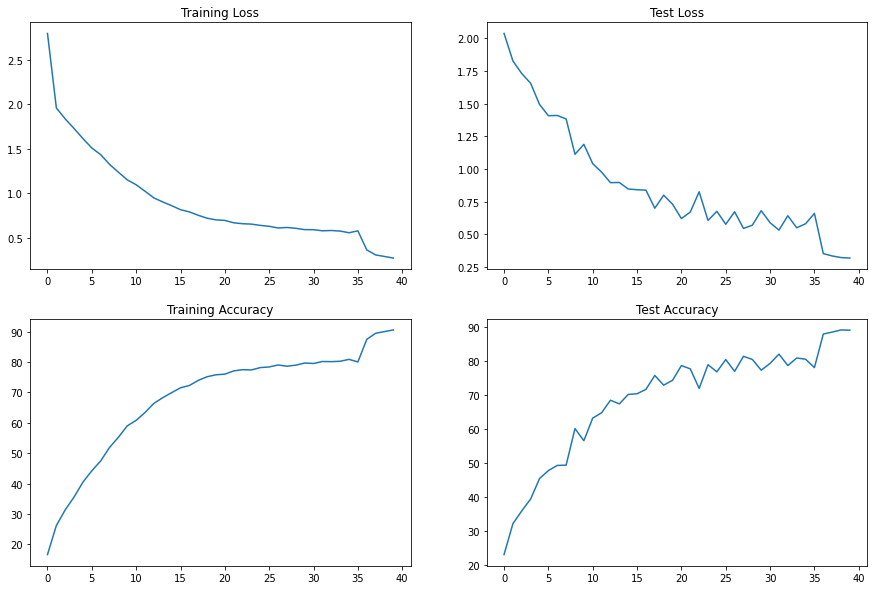

In [11]:
utils.plot_graph(train_loss, train_acc, test_loss, test_acc)

## Plot Correctly predicted Images

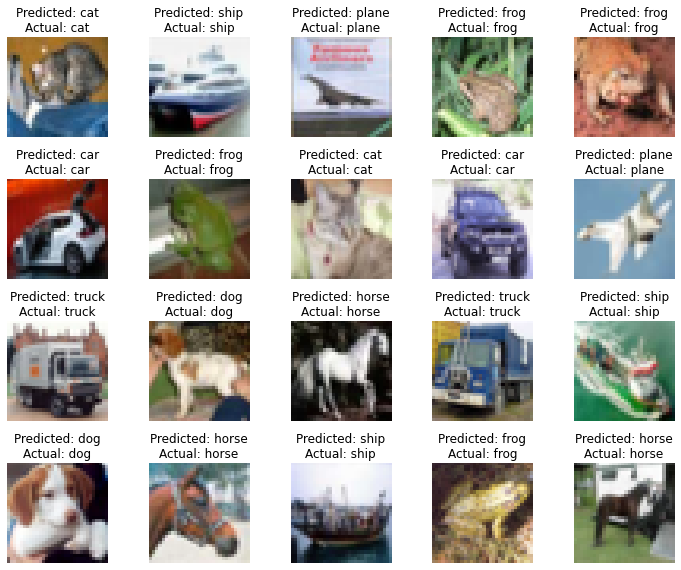

In [12]:
utils.plot_images(correct_images, classes)

## Plot incorrectly predicted images

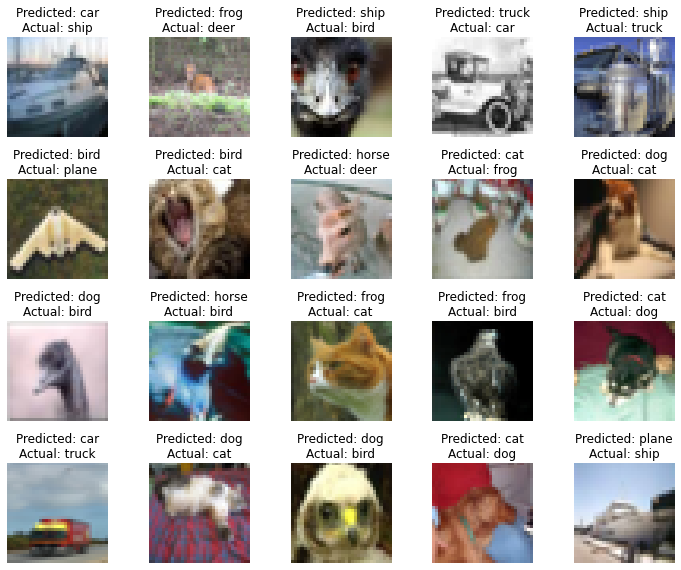

In [13]:
utils.plot_images(incorrect_images, classes)

## Plot gradcam for correctly predicted Images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


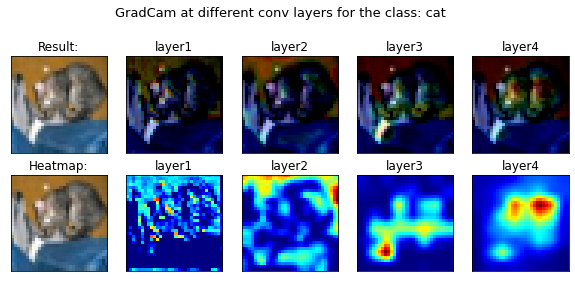

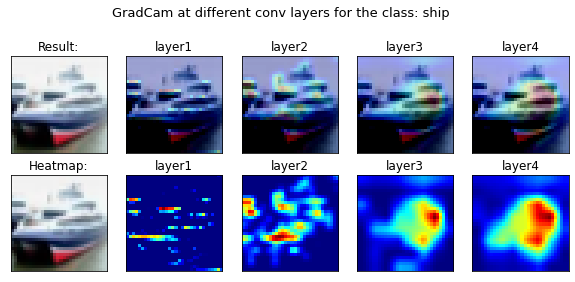

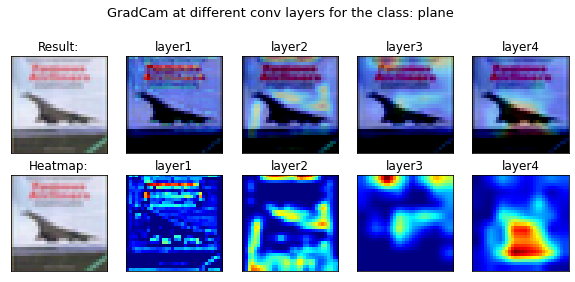

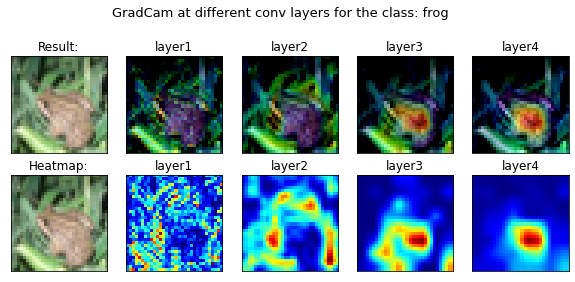

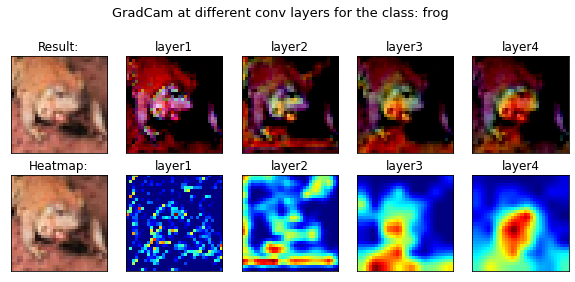

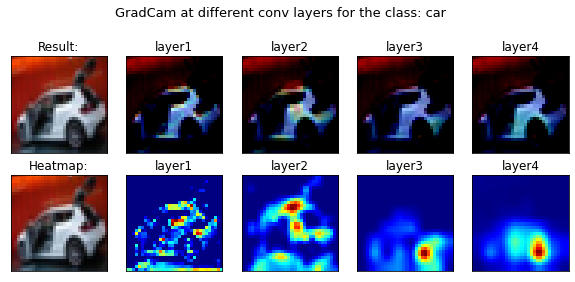

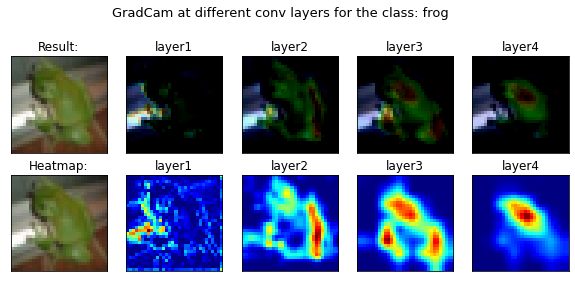

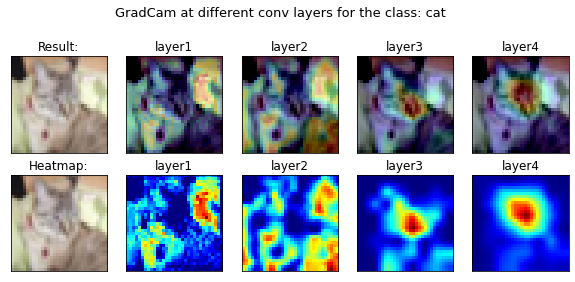

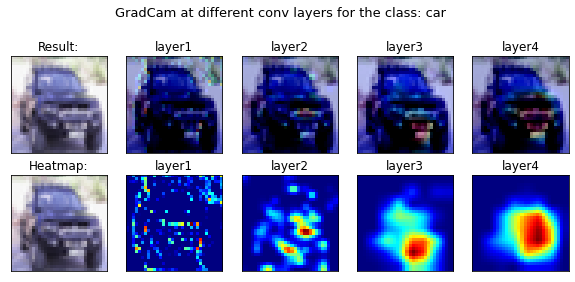

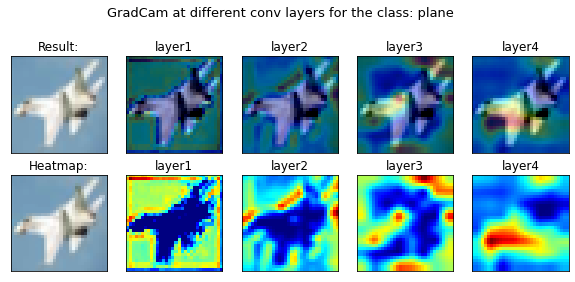

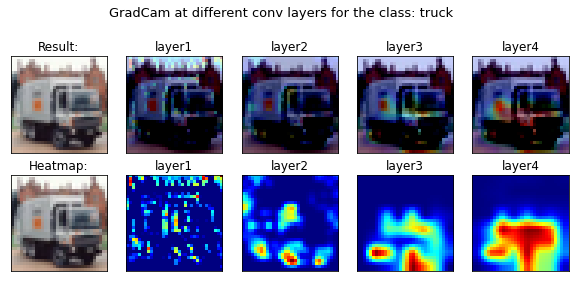

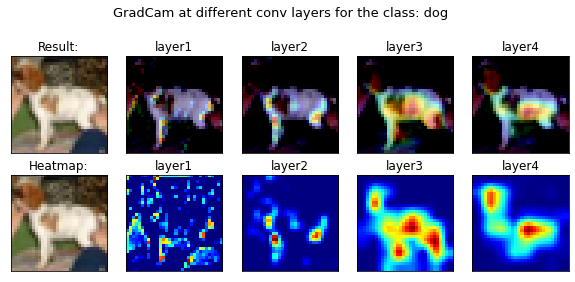

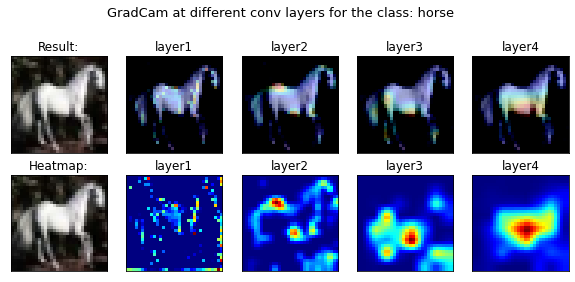

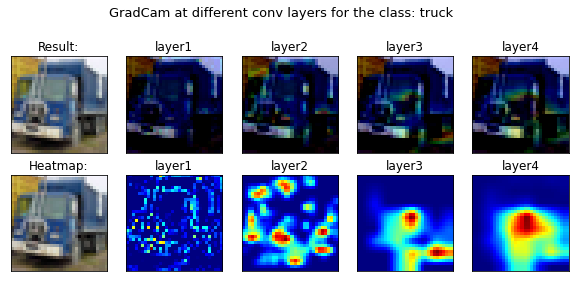

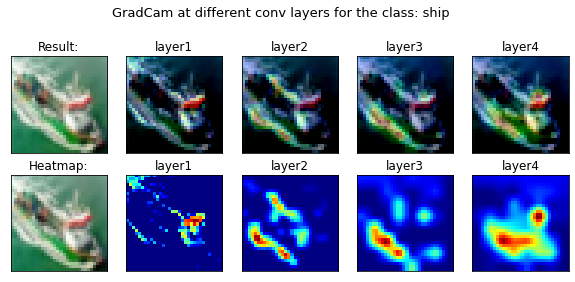

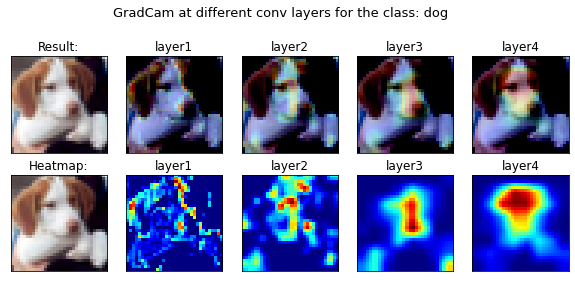

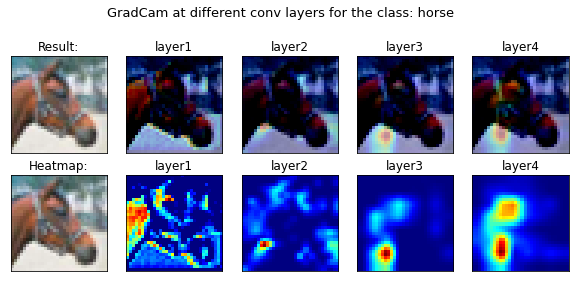

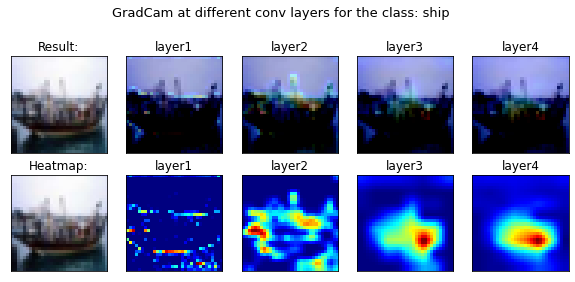

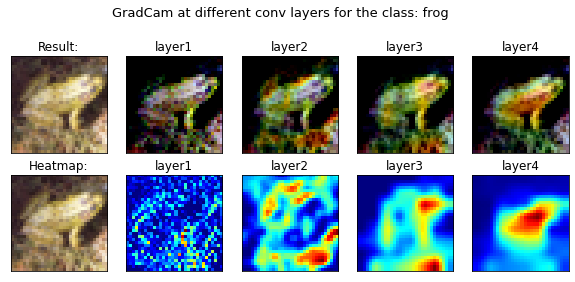

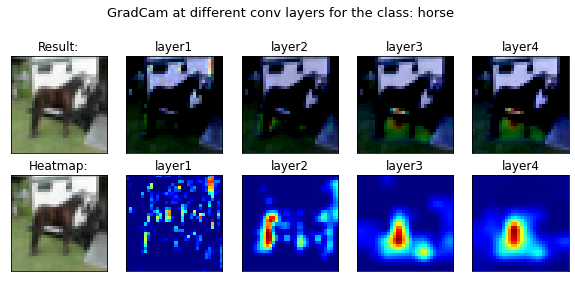

In [14]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(net,classes, target_layers)
num_img = 20
correct_pred_imgs = []
count = 0
for i in range(num_img):
  correct_pred_imgs.append(torch.as_tensor(correct_images[i]["img"]))
viz_cam(torch.stack(correct_pred_imgs), target_layers, metric="correct")

## Plot gradcam for incorrectly predicted Images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


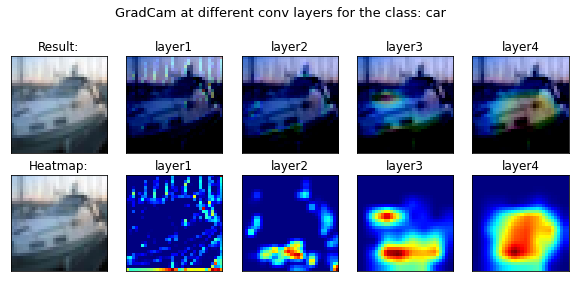

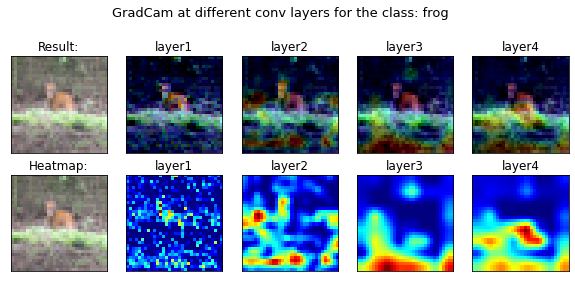

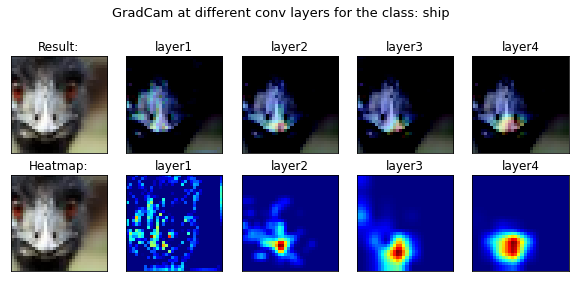

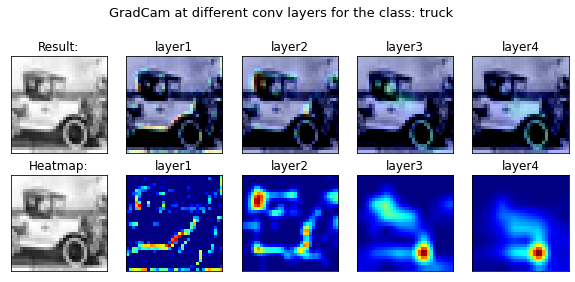

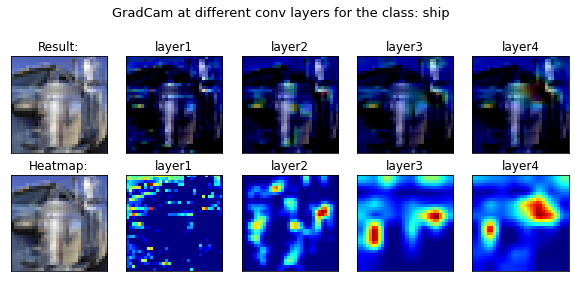

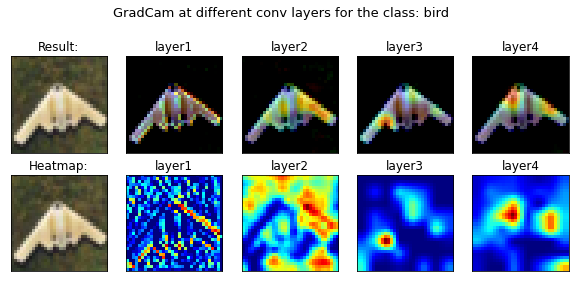

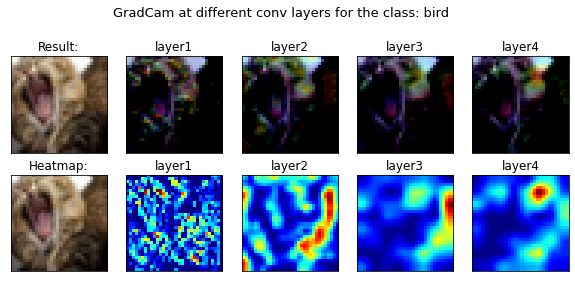

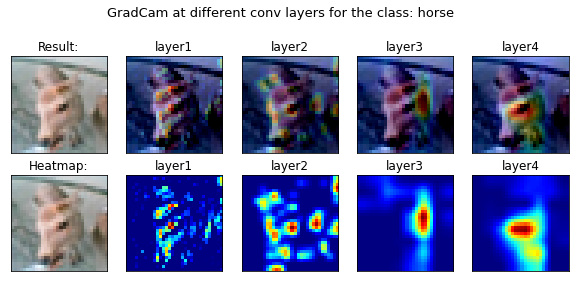

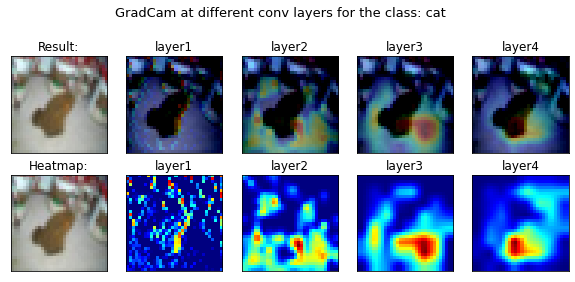

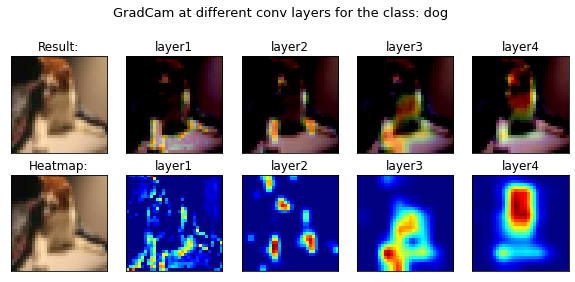

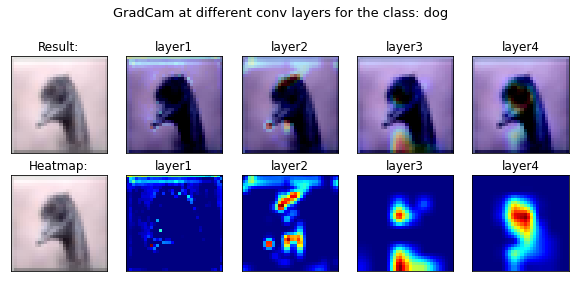

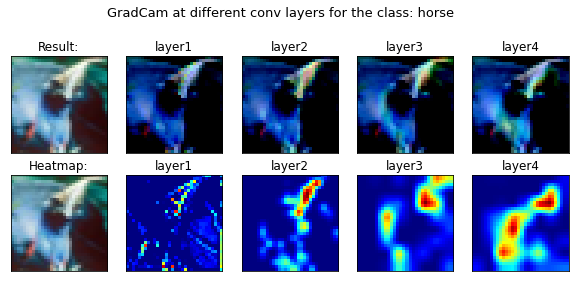

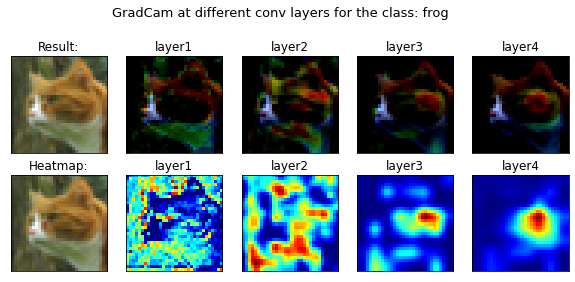

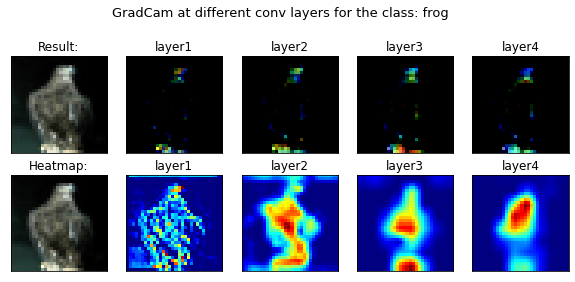

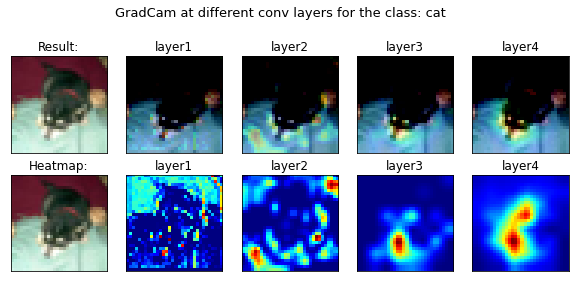

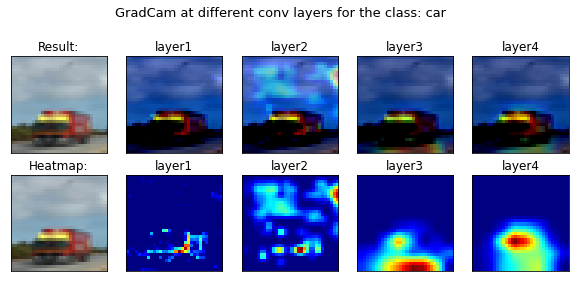

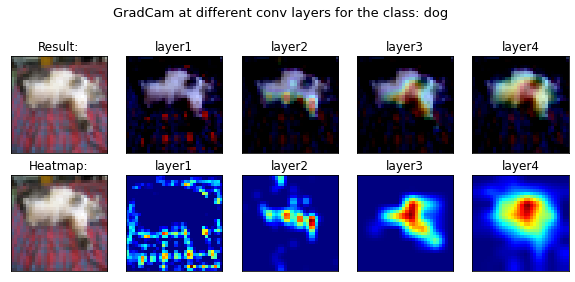

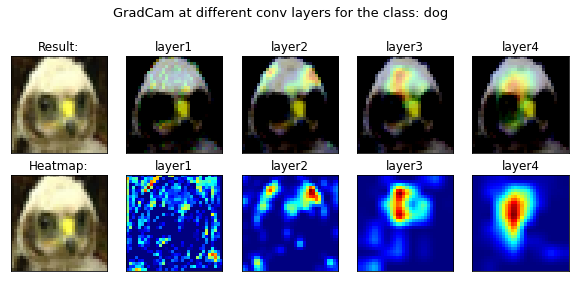

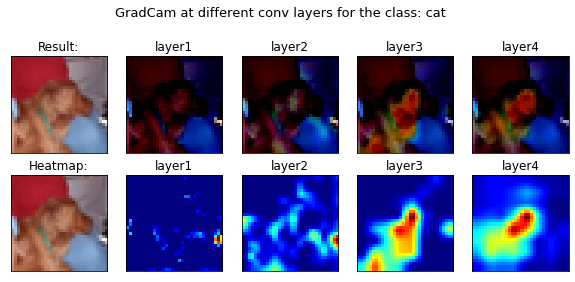

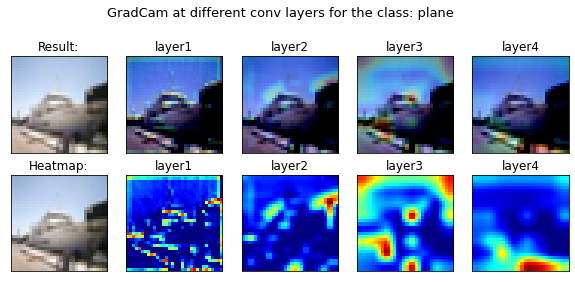

In [15]:
incorrect_pred_imgs = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(incorrect_images[i]["img"]))
viz_cam(torch.stack(incorrect_pred_imgs), target_layers, metric="incorrect")